# Mankiw Romer Weil (1992)

## Introduction & motivation
<div style={{ textAlign: 'justify' }}>
For a long time, the central question in economics has been whether there is an economic convergence across countries. Trying to adress this question, Mankiw, Romer, Weil (1992) arise as one of the most relevant papers in the field of economics. The purpose of the paper is to test the validity of the Solow model (Solow (1956)), one of the most famous frameworks to understand the economic growth process. This model attempts to explain the economic growth based on capital accumulation, labour and population growth and technology advancements (which captures the increases in productivity), setting investment as the primary source of growth. One of the striking implications of the Solow Model is that it predicts an unconditional economic convergence in the long run. Therefore, according to the model, two countries with the same parameters, but starting at the different points will end up in the same exact steady state. Consequently, once a country has the main economic and demographic parameters, the pattern of growth is just a matter of time. 

Given the astonishing implications of the Solow model, it is critical to test whether the model holds or not with real world data. This paper aims to derive and simulate the Solow Model and replicate the empirical analysis done in Mankiw, Romer, Weil (1992) using python language. In section 2), we first present the Solow Model and a model simulation to help understand the underlying process of convergence. Then, in 3) we define an econometric specification and we conduct an empirical analysis given the expression of income per capita as a reference. In 4) we present the augmented Solow Model as an alternative to the classical Solow Model and we conduct, again, an empirical analysis to test its validity with real world data. Finally, in 5) we describe the main findings of this paper and some open discussion. 
</div>

### Research Questions: 
1. How does Solow Model work and what are its dynamics?
2. Does the Solow Model hold with real world data?
3. Does the augmented Solow Model hold with real world data?

To address question 1), we present and simulate the Solow Model. For questions 2) and 3) we conduct an empirical analysis taking the output per worker expression as a reference. 

## The Solow Model: derivation and simulation
We first provide a derivation and simulation of the Solow Model with technological progress and growth given some paremters.

In [1]:
# necessary imports
from scipy import optimize
from numpy import array,arange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import statsmodels.formula.api as sm
from math import log
from statsmodels.iolib.summary2 import summary_col #To include three regression models in one table.
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


### Assumptions of the Solow model ###

<div style={{ textAlign: 'justify' }}>
The central assumptions of the Solow model concern the properties of the production function and the evolution of the three inputs into production (capital K, labor L, and the effectiveness of labor A) over time. The main assumptions are as follows:

1. Production function has constant returns to scale in its two arguments, capital and effective labor. That is, doubling the quantities of capital and effective labor (for example, by doubling K and L with A held fixed) doubles the amount produced.

    Mathematically $F (cK, cAL) = cF (K, AL)$ for all c $\geq$ 0
    
    Intuition: The assumption of constant returns can be thought of as a combination of two separate assumptions. The first is that the economy is big enough that the gains from specialization have been exhausted. In a very small economy, there are likely to be enough possibilities for further specialization that doubling the amounts of capital and labor more than doubles output. The Solow model assumes, however, that the economy is sufficiently large that, if capital and labor double, the new inputs are used in essentially the same way as the existing inputs, and so output doubles.
    
    
2. Inputs other than capital, labor, and the effectiveness of labor are relatively unimportant. In particular, the model neglects land and other natural resources.


3. The initial levels of capital, labor, and knowledge are taken as given, and are assumed to be strictly positive.


4. Labor and knowledge grow at constant rates:

    $\dot{L}(t)=nL(t)$
    
    $\dot{A}(t)=gA(t)$
    

5. Existing capital depreciates at rate $\delta$


6. Sum of $n, g$ and $\delta$ is strictly positive
</div>

### Analytics of the Solow model ###

<div style={{ textAlign: 'justify' }}>
The Solow model is built around two equations, a production function and a capital accumulation equation. 

_Production function equation_:

The production function describes how inputs such as bulldozers, semiconductors, engineers, and steel-workers combine to produce output. To simplify the model, we group these inputs into two categories, capital, K, and labor, L, and denote output as Y. We also introduce technological variable, A in the basic Solow model to simulate the generation of sustained growth in per capita income. The production function is assumed to have the Cobb-Douglas form and is given by:
</div>

$$
\begin{align*}
Y = K^{\alpha}(AL)^{1-\alpha} 
\end{align*}
$$

$\alpha$ : output elasticity of capital

1-$\alpha$ : output elasticity of effective labor

Since $\alpha$+(1-$\alpha$) = 1, this production function displays constant returns to scale, meaning that doubling the usage of capital K and effective labor AL will also double output Y.

In [2]:
# defining the production function for simulation
def production_function(K,L,alpha):
    return K**alpha*((A*L)**(1-alpha))

Let's graph this production function and see it's shape.

In [3]:
# range of Capital (K) to plot the graphs
range_K = arange(0.00,1300.0,0.01)

In [4]:
type(range_K)

numpy.ndarray

In [5]:
# some exogenous parameters
alpha = 1/3 #Share of capital 
A=1.5 #Technology level
s=0.3 #Savings rate
n=0.02 #Population growth
d=0.1 #Depreciation
g=0.1 #Technological growth
L=1 #Labour

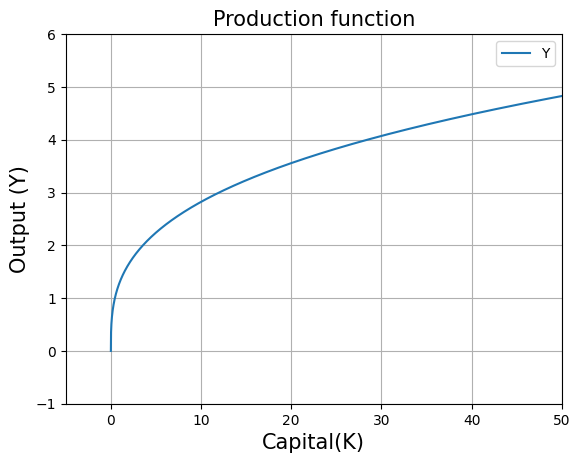

In [6]:
plt.title("Production function",fontsize=15)
plt.xlabel("Capital(K)", fontsize=15)
plt.ylabel("Output (Y)",fontsize=15)
plt.plot(range_K,[production_function(i,L,alpha) for i in range_K],label="Y") 
#the above code line takes values from range_K array one by one and supplies to production_function to plot the graph

plt.legend() #legend box
plt.grid() #grid lines
plt.axis([-5, 50, -1, 6]) #this removes the extra part of the graph
plt.show()

The concavity of the graph shows the existence of diminishing marginal returns to capital.

Now we transform the production function to production per effective worker function.

$$
\begin{align*}
Y/AL = y = k^{\alpha}, \hspace{0.2cm}where\hspace{0.2cm}k = \frac{K}{AL}
\end{align*}
$$

In [7]:
# defining the production per effective worker function for simulation
def production_function_per_eff_w(K,alpha):
    return ((K/(A*L))**alpha)

Let's graph this production per effective worker function.

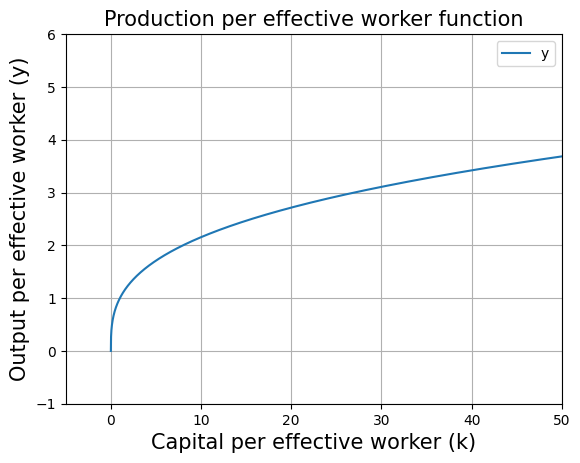

In [8]:
plt.title("Production per effective worker function",fontsize=15)
plt.xlabel("Capital per effective worker (k)", fontsize=15)
plt.ylabel("Output per effective worker (y)",fontsize=15)
plt.plot(range_K/(A*L),[production_function_per_eff_w(i,alpha) for i in range_K],label="y")
#The above code line takes values from range_K array one by one and supplies to production_function_per_eff_w to plot the graph.
#In the above code line we have range_K/(A*L) because we defined range_K as Capital values but here we want Capital per effective worker on the x-axis. 
#Therefore range_K is divided by (A*L).

plt.legend()
plt.grid()
plt.axis([-5, 50, -1, 6])#this removes the extra part of the graph
plt.show()

**Capital accumulation equation:** 

This is the second key equation of the Solow model which describes how capital accumulates. The capital accumulation equation is given by:

$$
\begin{align*}
\dot{k} = \frac{dk}{dt} = sy - (n+\delta + g )k ,\hspace{0.2cm}where\hspace{0.2cm}k = \frac{K}{AL}
\end{align*}
$$

$s$: savings rate in the economy

$n$: population growth rate

$\delta$: depreciation rate of the capital

$g$: technological growth rate

$(n+\delta+g)k$ : effective depreciation in the economy

Let's graph the capital accumulation equation. The capital accumulation equation has two components: $sy$ and $(n+\delta+g)k$. First we need to define a function for effective depreciation to plot the capital accumulation function.

In [9]:
# defining the effective depreciation
def effective_depreciation(n,d,g,K):
    return (n+d+g)*(K/(A*L))

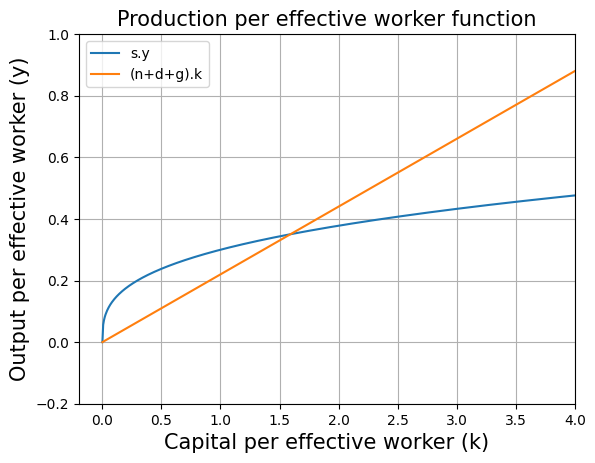

In [10]:
plt.title("Production per effective worker function",fontsize=15)
plt.xlabel("Capital per effective worker (k)", fontsize=15)
plt.ylabel("Output per effective worker (y)",fontsize=15)
plt.plot(range_K/(A*L),[production_function_per_eff_w(i,alpha)*s for i in range_K],label="s.y")
plt.plot(range_K/(A*L),[effective_depreciation(n,d,g,i) for i in range_K],label="(n+d+g).k")
#the above code line takes values from range_K array one by one and supplies to effective_depreciation to plot the graph
#in the above code line we have range_K/(A*L) because we defined range_K as Capital values but here we want Capital per effective worker on the x-axis. Therefore range_K is divided by (A*L).

plt.legend()
plt.grid()
plt.axis([-0.2, 4, -0.2, 1])#this removes the extra part of the graph
plt.show()

**Solve for the steady state**

A steady state of the economy is defined as any level $k^{∗}$ such that, if the economy starts with $k_0$ = $k^{∗}$, then $k_t$ = $k^{∗}$ for all t $\geq$ 1. (George-Marios Angeletos)

To calculate the steady state $k^{*}$ we need to equate the following equation to zero.

$\dot{k} = \frac{dk}{dt} = sy - (n+\delta + g )k = 0 ,\hspace{0.2cm}where\hspace{0.2cm}k = \frac{K}{AL}\newline$

$sy = (n+\delta + g )k$

$k^{*}=\frac{sy}{n+\delta + g}=\frac{sk^{*^{\alpha}}}{n+\delta + g}$

$k^{*}=\big(\frac{s}{n+\delta + g}\big)^{\frac{1}{1-\alpha}}$ :This is the analytical solution for steady state capital.

In [11]:
#solve for kstar
(s/(n+d+g))**(1/(1-alpha))

1.5923842039667508

Steady state $k^{*}$ can also be solved numerically with the help of optimize.fsolve function. We just need find an intersection point betweem savings curve and effective depreciation.

In [12]:
initial_guess =1
kstar=optimize.fsolve(lambda w: ((production_function_per_eff_w(w*A*L,alpha)*s) - effective_depreciation(n,d,g,w*A*L)),initial_guess)
#optimize.fsolve will give such a value of w where (production_function_per_eff_w-effective_depreciation) is zero
#optimize.fsolve works on newton raphson method to find the solution and therefore it is required to provide a intial guess solution to optimize.fsolve
#inside the lambda function we need to multiply w with AL because both the functions (production_function_per_eff_w and effective_depreciation) takes Capital in argument and we need Capital per effective worker as the output of optimize.fsolve

In [13]:
kstar

array([1.5923842])

We can see that both numerical and analytical solutions are equal

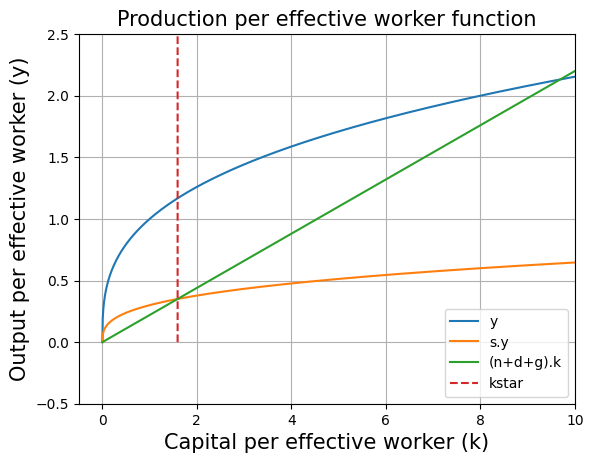

In [14]:
#plot kstar in graph
plt.title("Production per effective worker function",fontsize=15)
plt.xlabel("Capital per effective worker (k)", fontsize=15)
plt.ylabel("Output per effective worker (y)",fontsize=15)
plt.plot(range_K/(A*L),[production_function_per_eff_w(i,alpha) for i in range_K],label="y")
plt.plot(range_K/(A*L),[production_function_per_eff_w(i,alpha)*s for i in range_K],label="s.y")
plt.plot(range_K/(A*L),[effective_depreciation(n,d,g,i) for i in range_K],label="(n+d+g).k")
#in the above code line we have range_K/(A*L) because we defined range_K as Capital values but here we want Capital per effective worker on the x-axis. Therefore range_K is divided by (A*L).

plt.plot([kstar for i in range_K],[i for i in range_K],'--',label="kstar") #same xvalue (kstar) for different yvalues

plt.legend()
plt.grid()
plt.axis([-0.5, 10, -0.5, 2.5])
plt.show()

At steady state, $A$ and $L$ are growing at the rate of $g$ and $n$ respectively and $\frac{Y}{AL}$ is constant. This implies that Y must be growing at the rate of $g+n$. Hence the GDP growth rate is $g+n$.

In [15]:
# GDP growth rate
print(round((g+n)*100,2),"percent")

12.0 percent


<div style={{ textAlign: 'justify' }}>
According to the Solow model, convergence to the steady is always ensured (MIT 14.05 Lecture Notes: The Solow Model Proposition 4)

We find that $k^{*}=\big(\frac{s}{n+\delta + g}\big)^{\frac{1}{1-\alpha}}$. This implies that steady state capital per effective worker depends upon five parameters only and those are population growth ($n$), technological growth ($g$), depreciation ($\delta$), savings rate ($s$) and capital's share in income ($\alpha$).
This gives rise to the concept of unconditional convergence which states that if two countries have different levels of economic development (namely different $k_0$ and $y_0$) but otherwise share the same fundamental characteristics (namely share the same technologies, saving rates, depreciation rates, and fertility rates), then the poorer country will grow faster than the richer one and will eventually (asymptotically) catch up with it (MIT 14.05 Lecture Notes: The Solow Model Proposition 4).
</div>

### Dynamics of the Solow model ###

In [16]:
# set the saving rate in the economy to 30%
s=0.3

In [17]:
# intial values
K0 = 1 #Capital
L0 = 1 #Labor
A0 = 1 #Technology level
Y0=((A0*L0)**(1-alpha))*(K0**alpha) #from the production function
Y_AL0=Y0/(A0*L0) #Production per effective worker function
T=100 #Number of years

In [18]:
# intiating the lists of the main  variables for the dynamics
Time=[1901] #Year
L=[L0] #Labor
K=[K0] #Capital
A=[A0] #Technology level
Y=[Y0] #Output
Y_AL=[Y_AL0] #Production per effective worker function
for i in range(T):
    L.append((1+n)*L[i]) #for instance L1=(1+n)*L0
    A.append((1+g)*A[i]) #for instance A1=(1+g)*A0
    K.append((s*Y[i]) - (d*K[i]) + K[i]) #for instance K1=(s*Y0) - (d*K0) + K0
    Y.append(((A[i+1]*L[i+1])**(1-alpha))*(K[i+1]**alpha)) #for instance Y1=((A1*L1)**(1-alpha))*(K1**alpha)
    Y_AL.append(Y[i+1]/(A[i+1]*L[i+1])) #for instance Y_AL1=Y1/(A1*L1)
    Time.append(1+Time[i]) #for instance T1=1+T0

In [19]:
# creating the dataframe from the lists to plot the graphs
data = pd.DataFrame({'Time': Time,'Y': Y, 'K': K,'L':L,'A':A, 'Y/AL':Y_AL})
print(data.to_markdown())

|     |   Time |            Y |            K |       L |           A |    Y/AL |
|----:|-------:|-------------:|-------------:|--------:|------------:|--------:|
|   0 |   1901 |      1       |      1       | 1       |     1       | 1       |
|   1 |   1902 |      1.14742 |      1.2     | 1.02    |     1.1     | 1.02266 |
|   2 |   1903 |      1.31175 |      1.42423 | 1.0404  |     1.21    | 1.04199 |
|   3 |   1904 |      1.49515 |      1.67533 | 1.06121 |     1.331   | 1.05854 |
|   4 |   1905 |      1.70005 |      1.95634 | 1.08243 |     1.4641  | 1.07273 |
|   5 |   1906 |      1.92914 |      2.27072 | 1.10408 |     1.61051 | 1.08493 |
|   6 |   1907 |      2.18543 |      2.62239 | 1.12616 |     1.77156 | 1.09542 |
|   7 |   1908 |      2.47229 |      3.01578 | 1.14869 |     1.94872 | 1.10446 |
|   8 |   1909 |      2.7935  |      3.45589 | 1.17166 |     2.14359 | 1.11226 |
|   9 |   1910 |      3.15328 |      3.94835 | 1.19509 |     2.35795 | 1.11899 |
|  10 |   1911 |      3.5563

In [20]:
log_Y=[log(x) for x in Y] #Y reaches a very high value in 100 years therefore to plot it nicely we transform it to log values

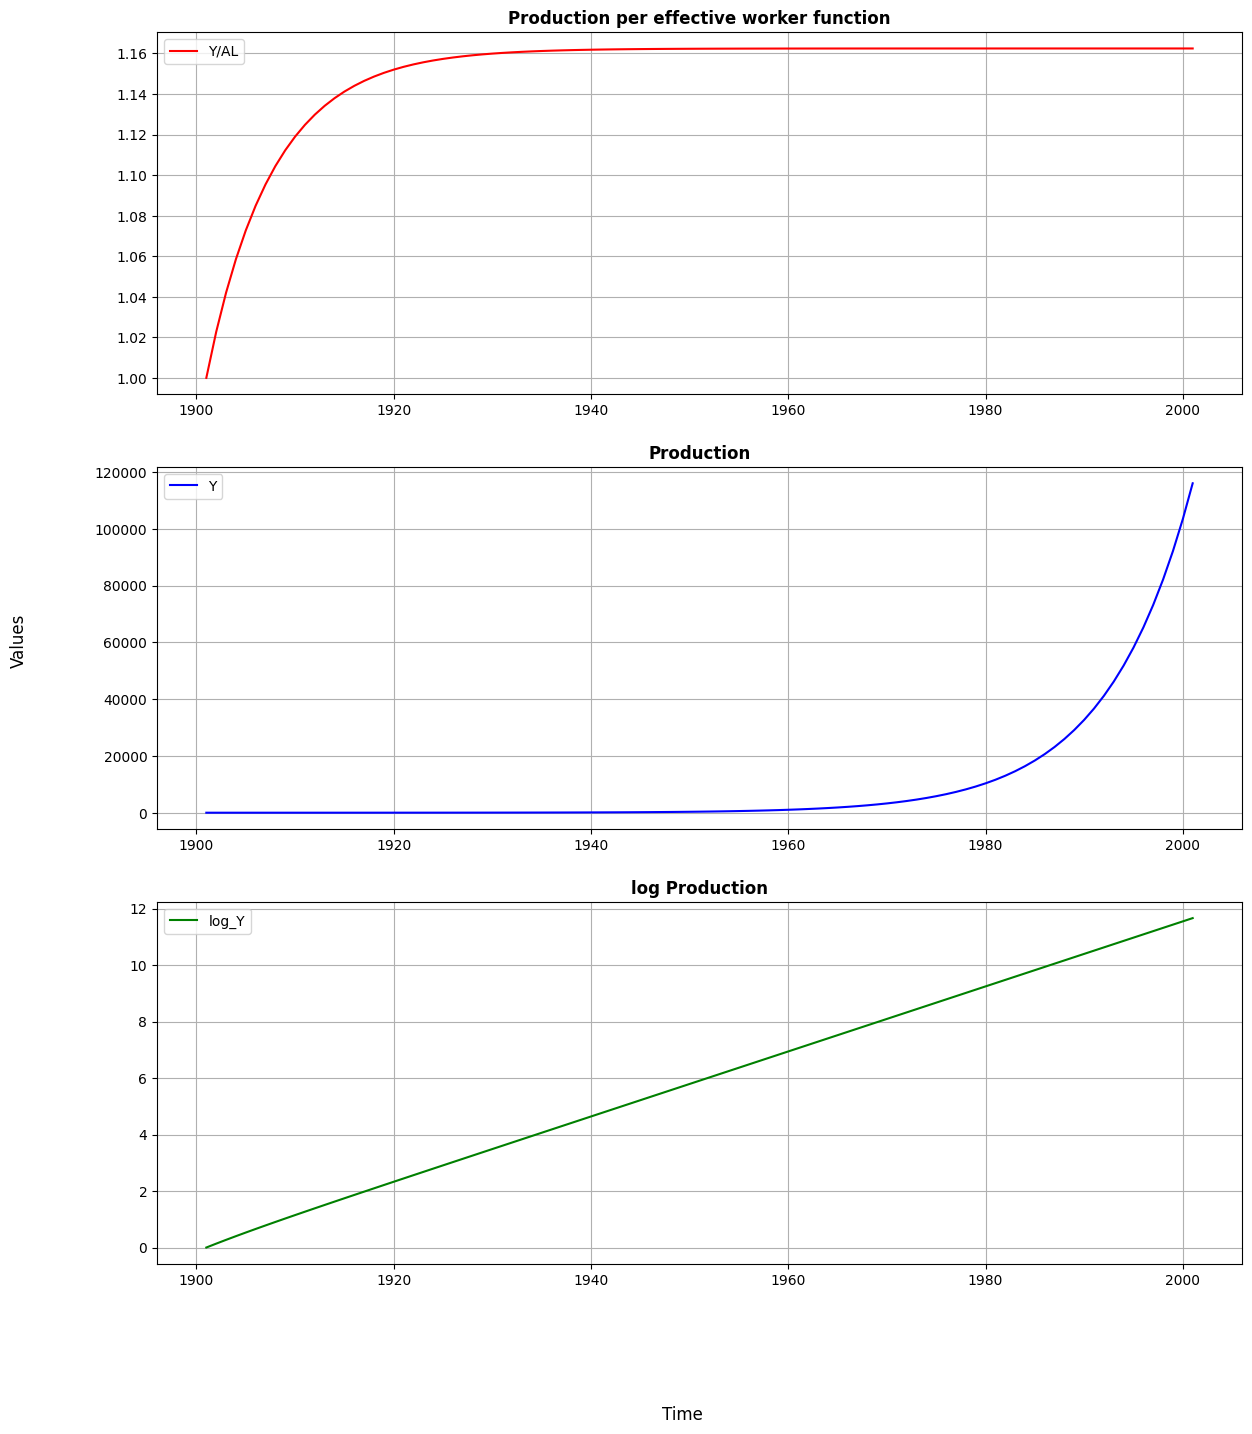

In [21]:
fig, ax = plt.subplots(3,1,figsize=(14,16)) #3 subplots in 1 column.

#subplot 1 for Production per effective worker function
ax[0].plot(Time,Y_AL,'r',label='Y/AL') 
ax[0].set_title('Production per effective worker function',fontweight="bold")
ax[0].grid()
ax[0].legend()

#subplot 2 for Production
ax[1].plot(Time,Y,'b',label='Y') 
ax[1].ticklabel_format(style='plain')
ax[1].set_title('Production',fontweight="bold")
ax[1].grid()
ax[1].legend()

#subplot 3 for log Production
ax[2].plot(Time,log_Y,'g',label='log_Y')
ax[2].set_title('log Production',fontweight="bold")
ax[2].grid()
ax[2].legend()

#Common x-axis and y-axis labels for all the 3 subplots.
fig.supxlabel('Time')#labelling x-axis
fig.supylabel('Values')#labelling y-axis

plt.show()

<div style={{ textAlign: 'justify' }}>
In the first graph we observe how production per effective worker is evolving over time. It is characterized by the diminishing returns to scale from capital that shapes a concave function. Once steady state is reached, around 1934, the production per effective worker stays at a stable level. According to our simulation, this value is around 1.162.

The second graph shows how production changes over time. When it comes to production per effective worker, the key distinction is that after the steady state is attained, production continues to expand at the rate of $g+n$. In the long run, the production grows exponentially as a result of the constant growth rate.

Lastly, in the third graph we present how log of production evolve over time. Since production reaches a very high value in 100 years, in order to plot it nicely, we transform it to log values. This is intended to aid in the visualisation of the evolution of production.
</div>

### Sensitivity analysis of the Solow model

<div style={{ textAlign: 'justify' }}>
Since one of the purposes of our research is to show how savings affect growth and steady state levels, it is interesting to see how our model simulation responds to alterations in the rate of savings of the economy. 

Note: Here we would like to highlight the fact that change in saving rates does not affect the steady state GDP growth rate of the economy because at steady state the GDP growth rate is equal to $g+n$, that is, sum of technological and population growth rates. Hence, change in saving rates would only affect the growth dynamics as we will show now.
</div>

In [22]:
s=[0.20,0.30,0.35,0.40,0.45] #list of different saving values
data_list=[]

#we have to run a for loop over savings list s to have the dynamics for every savings rate.
for s in s:
    # intial values
    K0 = 1 #Capital
    L0 = 1 #Labor
    A0 = 1 #Technology level
    Y0=((A0*L0)**(1-alpha))*(K0**alpha) #from the production function
    Y_AL0=Y0/(A0*L0) #Production per effective worker function
    T=100 #Number of years

    # intiating the lists of the main  variables
    Time=[1901] #Year
    L=[L0] #Labor
    K=[K0] #Capital
    A=[A0] #Technology level
    Y=[Y0] #Output
    Y_AL=[Y_AL0] #Production per effective worker function
    for i in range(T):
        L.append((1+n)*L[i])
        A.append((1+g)*A[i])
        K.append((s*Y[i]) - (d*K[i]) + K[i])
        Y.append(((A[i+1]*L[i+1])**(1-alpha))*(K[i+1]**alpha)) #explain i+1?
        Y_AL.append(Y[i+1]/(A[i+1]*L[i+1]))
        Time.append(1+Time[i])
    log_Y=[log(x) for x in Y]#Y reaches a very high value in 100 years therefore to plot it nicely we transform it to log values
    
    # creating the dataframes to plot the graphs
    data = pd.DataFrame({'Time': Time,'Y': Y, 'K': K,'L':L,'A':A, 'Y/AL':Y_AL,'log_Y':log_Y})
    data_list.append(data) #all dataframes of dynamics corresponding to different savings rate is stored in data_list

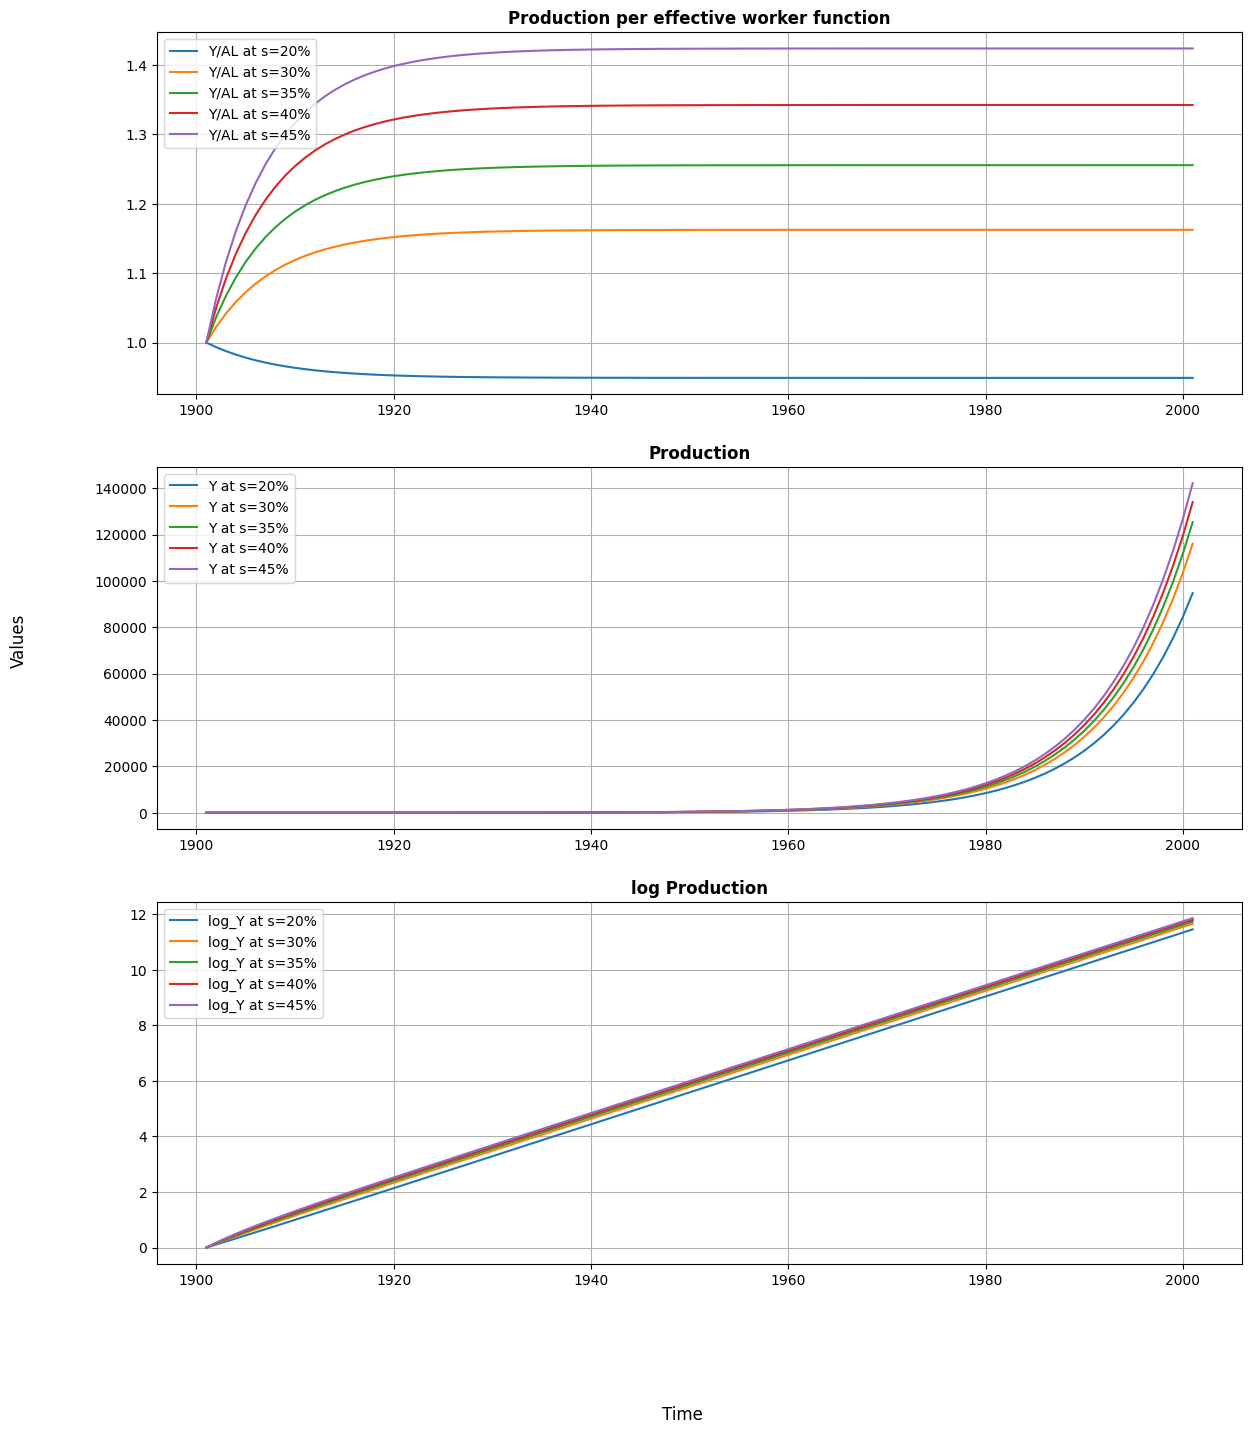

In [23]:
fig, ax = plt.subplots(3,1,figsize=(14,16)) #3 subplots in 1 column.

#subplot 1 for Production per effective worker function
ax[0].plot(data_list[0]['Time'],data_list[0]['Y/AL'],label='Y/AL at s=20%') #for 20% savings rate
ax[0].plot(data_list[1]['Time'],data_list[1]['Y/AL'],label='Y/AL at s=30%') #for 30% savings rate
ax[0].plot(data_list[2]['Time'],data_list[2]['Y/AL'],label='Y/AL at s=35%') #for 35% savings rate
ax[0].plot(data_list[3]['Time'],data_list[3]['Y/AL'],label='Y/AL at s=40%') #for 40% savings rate
ax[0].plot(data_list[4]['Time'],data_list[4]['Y/AL'],label='Y/AL at s=45%') #for 45% savings rate
ax[0].set_title('Production per effective worker function',fontweight="bold")
ax[0].grid()
ax[0].legend()

#subplot 2 for Production
ax[1].plot(data_list[0]['Time'],data_list[0]['Y'],label='Y at s=20%') #for 20% savings rate
ax[1].plot(data_list[1]['Time'],data_list[1]['Y'],label='Y at s=30%') #for 30% savings rate
ax[1].plot(data_list[2]['Time'],data_list[2]['Y'],label='Y at s=35%') #for 35% savings rate
ax[1].plot(data_list[3]['Time'],data_list[3]['Y'],label='Y at s=40%') #for 40% savings rate
ax[1].plot(data_list[4]['Time'],data_list[4]['Y'],label='Y at s=45%') #for 45% savings rate
ax[1].ticklabel_format(style='plain')
ax[1].set_title('Production',fontweight="bold")
ax[1].grid()
ax[1].legend()

#subplot 3 for log Production
ax[2].plot(data_list[0]['Time'],data_list[0]['log_Y'],label='log_Y at s=20%') #for 20% savings rate
ax[2].plot(data_list[1]['Time'],data_list[1]['log_Y'],label='log_Y at s=30%') #for 30% savings rate
ax[2].plot(data_list[2]['Time'],data_list[2]['log_Y'],label='log_Y at s=35%') #for 35% savings rate
ax[2].plot(data_list[3]['Time'],data_list[3]['log_Y'],label='log_Y at s=40%') #for 40% savings rate
ax[2].plot(data_list[4]['Time'],data_list[4]['log_Y'],label='log_Y at s=45%') #for 45% savings rate
ax[2].set_title('log Production',fontweight="bold")
ax[2].grid()
ax[2].legend()

fig.supxlabel('Time')#labelling x-axis
fig.supylabel('Values')#labelling y-axis

plt.show()

<div style={{ textAlign: 'justify' }}>
As shown in the first graph, the savings rate is totally determinant of the steady state level of production per effective worker that a country achieves. If it is too low, depreciation will outweigh any gain from savings, and the value of production per effective worker will fall until it reaches a lower steady state. On the other hand, in the steady state, the higher the savings rate, the higher the level of production per effective worker.


The following two graphs have a similar interpretation: the higher the rate of savings, the higher the level of production. Although the savings rate does not affect the growth rate once steady state is reached, it does lead to different growth path.
</div>

## Empirical testing  of the Solow Model
In this first part we test the validity of Solow Model with the real world data that was used by Mankiw, Romer, Weil(1992).

### Econometric Specification, assumptions & preview of the answer

<div style={{ textAlign: 'justify' }}>
Once we have derived and simulate the Solow Model, we need to set an econometric specification to test the model empirically with real world data. First, by setting capital per effective worker accoumlation equation to be equal to 0

$$
\begin{align*}
\dot{k_t} = sk_t^{\alpha} - (n - g - \delta)k_t=0, \hspace{0.2cm}where\hspace{0.2cm}k = \frac{K}{AL}
\end{align*}
$$

We get the steady state capital per effective worker expression

$$
\begin{align*}
k^* = \left(\frac{s}{n + g + \delta}\right)^{1/(1 - \alpha)}
\end{align*}
$$

Putting this last expression into output per worker expression $Y/L_t = Ak_t^{\alpha}$ and taking logs, we can get the steady state level of output per worker (that can be interpreted as GDP or income per capita) as a function of the rate of savings $s$ and $(n+g+\delta)$. 

$$
\begin{align*}
ln(Y/L) = lnA(0) + \frac{\alpha}{(1 - \alpha)}ln(s) - \frac{\alpha}{(1 - \alpha)}ln(n + g + \delta)
\end{align*}
$$

In order to use this specification, we assume $g$ (advancement of knowledge) and $\delta$ (rate of depreciation) to be constant across countries. However, we do allow for differences in levels of technology $A(0)$, setting 

$$ 
\begin{align*}
lnA(0) = a + \epsilon
\end{align*}
$$

where $a$ is constant, and $\epsilon$ stands for country specific shocks. Therefore, our last expression is

$$
\begin{align*}
ln(Y/L) = a + \frac{\alpha}{(1 - \alpha)}ln(s) - \frac{\alpha}{(1 - \alpha)}ln(n + g + \delta) + \epsilon
\end{align*}
$$

Finally, we also assume the rate of savings $s$ and population growth $n$ to be independent of country-specific shocks $\epsilon$. This last assumption is needed to satisfy exogeneity condition and estimate the econometrics specification with Ordinary Least Squares (OLS). 
Although the independence assumption could be discussed, for the sake of simplicity we will not deepen in that issue, and we will take it as given by now.

**Preview answer**

Using OLS method and assuming a set of assumptions we expect to obtain reliable coefficients for $s$ and $ (n + g + \delta)$. We await for a positive coefficient of $s$, a negative coefficient of the same magnitude for $ (n + g + \delta)$ and a high r2 to explain output per worker variations. Finally, we expect to obtain an implied value of $\alpha$ close to 1/3, that is the empirical share of capital found. 
</div>

### Data: 

The data used for the this empirical analysis is taken from the Real National Accounts (Summers and Heston(1988)). This data is publically available by Professor Bruce E. Hansen of University of Wisconsin Madison, USA (https://www.ssc.wisc.edu/~bhansen/econometrics/MRW1992.xlsx). It is the same dataset used in Mankiw, Romer, Weil (1992)

In [24]:
data_url = 'https://www.ssc.wisc.edu/~bhansen/econometrics/MRW1992.xlsx'

In [25]:
#creating the main dataframe df for the analysis
df = pd.read_excel(data_url)

In [26]:
print(df.head().to_markdown()) #this shows the first five observations

|    | country      |   N |   I |   O |   Y60 |   Y85 |   Y_growth |   pop_growth |   invest |   school |
|---:|:-------------|----:|----:|----:|------:|------:|-----------:|-------------:|---------:|---------:|
|  0 | Algeria      |   1 |   1 |   0 |  2485 |  4371 |        4.8 |          2.6 |     24.1 |      4.5 |
|  1 | Angola       |   1 |   0 |   0 |  1588 |  1171 |        0.8 |          2.1 |      5.8 |      1.8 |
|  2 | Benin        |   1 |   0 |   0 |  1116 |  1071 |        2.2 |          2.4 |     10.8 |      1.8 |
|  3 | Botswana     |   1 |   1 |   0 |   959 |  3671 |        8.6 |          3.2 |     28.3 |      2.9 |
|  4 | Burkina Faso |   1 |   0 |   0 |   529 |   857 |        2.9 |          0.9 |     12.7 |      0.4 |


**Variable definitions:**

**'country'** : Country Name

**'N'** : 1 if all data is available and oil production is not the dominant industry, 0 otherwise

**'I'** : 1 if the population in 1960 were greater than one million, 0 otherwise

**'O'** : 1 if OECD country with I = 1, 0 otherwise

**'Y60'** : real GDP per working-age person in 1960, in dollars

**'Y85'** : real GDP per working-age person in 1985, in dollars

**'Y_growth'** : the yearly average growth rate (%) of real GDP for 1960-1985

**'pop_growth'** : the yearly average growth rate (%) of the working-age population for 1960-1985

**'invest'** : the share (%) of real investment (incl. government investment) in real GDP, averaged for 1960-1985

**'school'** : the fraction (%) of the eligible population enrolled in secondary school × the fraction (%) of the working age population that is of school age (aged 15 to 19), averaged for 1960-1985

In [27]:
print(df.describe().to_markdown()) #This gives a very basic understanding of the data

|       |          N |          I |          O |      Y60 |      Y85 |   Y_growth |   pop_growth |    invest |    school |
|:------|-----------:|-----------:|-----------:|---------:|---------:|-----------:|-------------:|----------:|----------:|
| count | 121        | 121        | 121        |   116    |   108    |  117       |   107        | 121       | 118       |
| mean  |   0.809917 |   0.619835 |   0.181818 |  3681.82 |  5683.26 |    4.09402 |     2.27944  |  18.157   |   5.52627 |
| std   |   0.393998 |   0.487446 |   0.387298 |  7492.88 |  5688.67 |    1.89146 |     0.998748 |   7.85331 |   3.53204 |
| min   |   0        |   0        |   0        |   383    |   412    |   -0.9     |     0.3      |   4.1     |   0.4     |
| 25%   |   1        |   0        |   0        |   973.25 |  1209.25 |    2.8     |     1.7      |  12       |   2.4     |
| 50%   |   1        |   1        |   0        |  1962    |  3484.5  |    3.9     |     2.4      |  17.7     |   4.95    |
| 75%   |   1   

**Data description:**
<div style={{ textAlign: 'justify' }}>
Data  has 121 countries.

MRW 1992 divided the data into three samples as follows:

**Sample 1**: The first subsample is the largest, consisting of the majority of countries available except those dominated by the oil industry. The exclusion of oil-producing countries is justified by the fact that resource extraction accounts for the majority of their GDP. As a result, there are 98 countries in this subsample.

In the dataframe df these countries have "N" column value equals to 1 (An indication for non oil countries).
</div>

In [28]:
print(df[df['N']==1].describe().to_markdown()) #This gives the data description of non oil countries only

|       |   N |         I |         O |      Y60 |      Y85 |   Y_growth |   pop_growth |   invest |   school |
|:------|----:|----------:|----------:|---------:|---------:|-----------:|-------------:|---------:|---------:|
| count |  98 | 98        | 98        |    98    |    98    |   98       |    98        | 98       | 98       |
| mean  |   1 |  0.765306 |  0.22449  |  2994.9  |  5309.77 |    3.9949  |     2.20102  | 17.6724  |  5.39694 |
| std   |   0 |  0.425986 |  0.419391 |  2862.52 |  5277.18 |    1.85913 |     0.889862 |  7.91833 |  3.46899 |
| min   |   1 |  0        |  0        |   383    |   412    |   -0.9     |     0.3      |  4.1     |  0.4     |
| 25%   |   1 |  1        |  0        |   963.75 |  1174.75 |    2.725   |     1.7      | 11.725   |  2.4     |
| 50%   |   1 |  1        |  0        |  1818    |  3150    |    3.8     |     2.4      | 17.1     |  4.75    |
| 75%   |   1 |  1        |  0        |  4113.25 |  7015    |    5.1     |     2.875    | 23.4     |  8 

<div style={{ textAlign: 'justify' }}>

**Sample 2**: The second subsample exclude not only oil producers, but also countries with “bad quality data”, that is graded with a "D" according to Summers and Heston (1988) or countries whose population was less than one million in 1960. On the one hand, this subsample is mainly aimed to avoid measurement errors. On the other hand, small countries are excluded because their real income may be determined by other factors than the value added. Therefore, this subsample contains a total of 75 countries.

In the dataframe df these countries have "I" column value equals to 1 (An indication for Intermediate countries).
</div>

In [29]:
print(df[df['I']==1].describe().to_markdown()) #This gives the data description of intermediate countries only

|       |   N |   I |         O |      Y60 |      Y85 |   Y_growth |   pop_growth |   invest |   school |
|:------|----:|----:|----------:|---------:|---------:|-----------:|-------------:|---------:|---------:|
| count |  75 |  75 | 75        |    75    |    75    |   75       |    75        | 75       | 75       |
| mean  |   1 |   1 |  0.293333 |  3620.76 |  6589.83 |    4.38133 |     2.16667  | 19.3507  |  6.38133 |
| std   |   0 |   0 |  0.458356 |  2999.98 |  5410.91 |    1.73623 |     0.975141 |  7.56595 |  3.23309 |
| min   |   1 |   1 |  0        |   383    |   608    |    0.9     |     0.3      |  5.4     |  0.5     |
| 25%   |   1 |   1 |  0        |  1347    |  2167    |    3.25    |     1.45     | 13.25    |  3.65    |
| 50%   |   1 |   1 |  0        |  2382    |  4492    |    4.1     |     2.4      | 19.5     |  6.6     |
| 75%   |   1 |   1 |  1        |  5016    | 11183.5  |    5.45    |     2.9      | 24.7     |  8.9     |
| max   |   1 |   1 |  1        | 12362    | 1

**Sample 3**: Finally, the last subsample takes only 22 OECD countries with population over one million. The data in this subsample seems to be uniformly accurate and adequate, but the size of the sample is unavoidably small and it discards much of the variation in the variables of interest.

In the dataframe df these countries have "O" column value equals to 1 (An indication for OECD countries).

In [30]:
print(df[df['O']==1].describe().to_markdown()) #This gives the data description of OECD countries only

|       |   N |   I |   O |      Y60 |      Y85 |   Y_growth |   pop_growth |   invest |   school |
|:------|----:|----:|----:|---------:|---------:|-----------:|-------------:|---------:|---------:|
| count |  22 |  22 |  22 |    22    |    22    |  22        |    22        | 22       | 22       |
| mean  |   1 |   1 |   1 |  6731.09 | 13131.5  |   3.86818  |     1.00909  | 25.7909  |  9.08636 |
| std   |   0 |   0 |   0 |  2803.65 |  4012.49 |   0.994454 |     0.605459 |  4.98597 |  2.08036 |
| min   |   1 |   1 |   1 |  2257    |  4444    |   2.5      |     0.3      | 17.7     |  4.8     |
| 25%   |   1 |   1 |   1 |  4536.5  | 11388.5  |   3.225    |     0.6      | 22.7     |  7.925   |
| 50%   |   1 |   1 |   1 |  7424.5  | 13594    |   3.75     |     0.75     | 25.35    |  9.1     |
| 75%   |   1 |   1 |   1 |  8314.5  | 15282    |   4.275    |     1.35     | 28.95    | 10.7     |
| max   |   1 |   1 |   1 | 12362    | 19723    |   6.8      |     2.5      | 36.9     | 11.9     |


**Data visualization:**
We present a brief data visualization section to get a better understanding of the dataset we are dealing with.

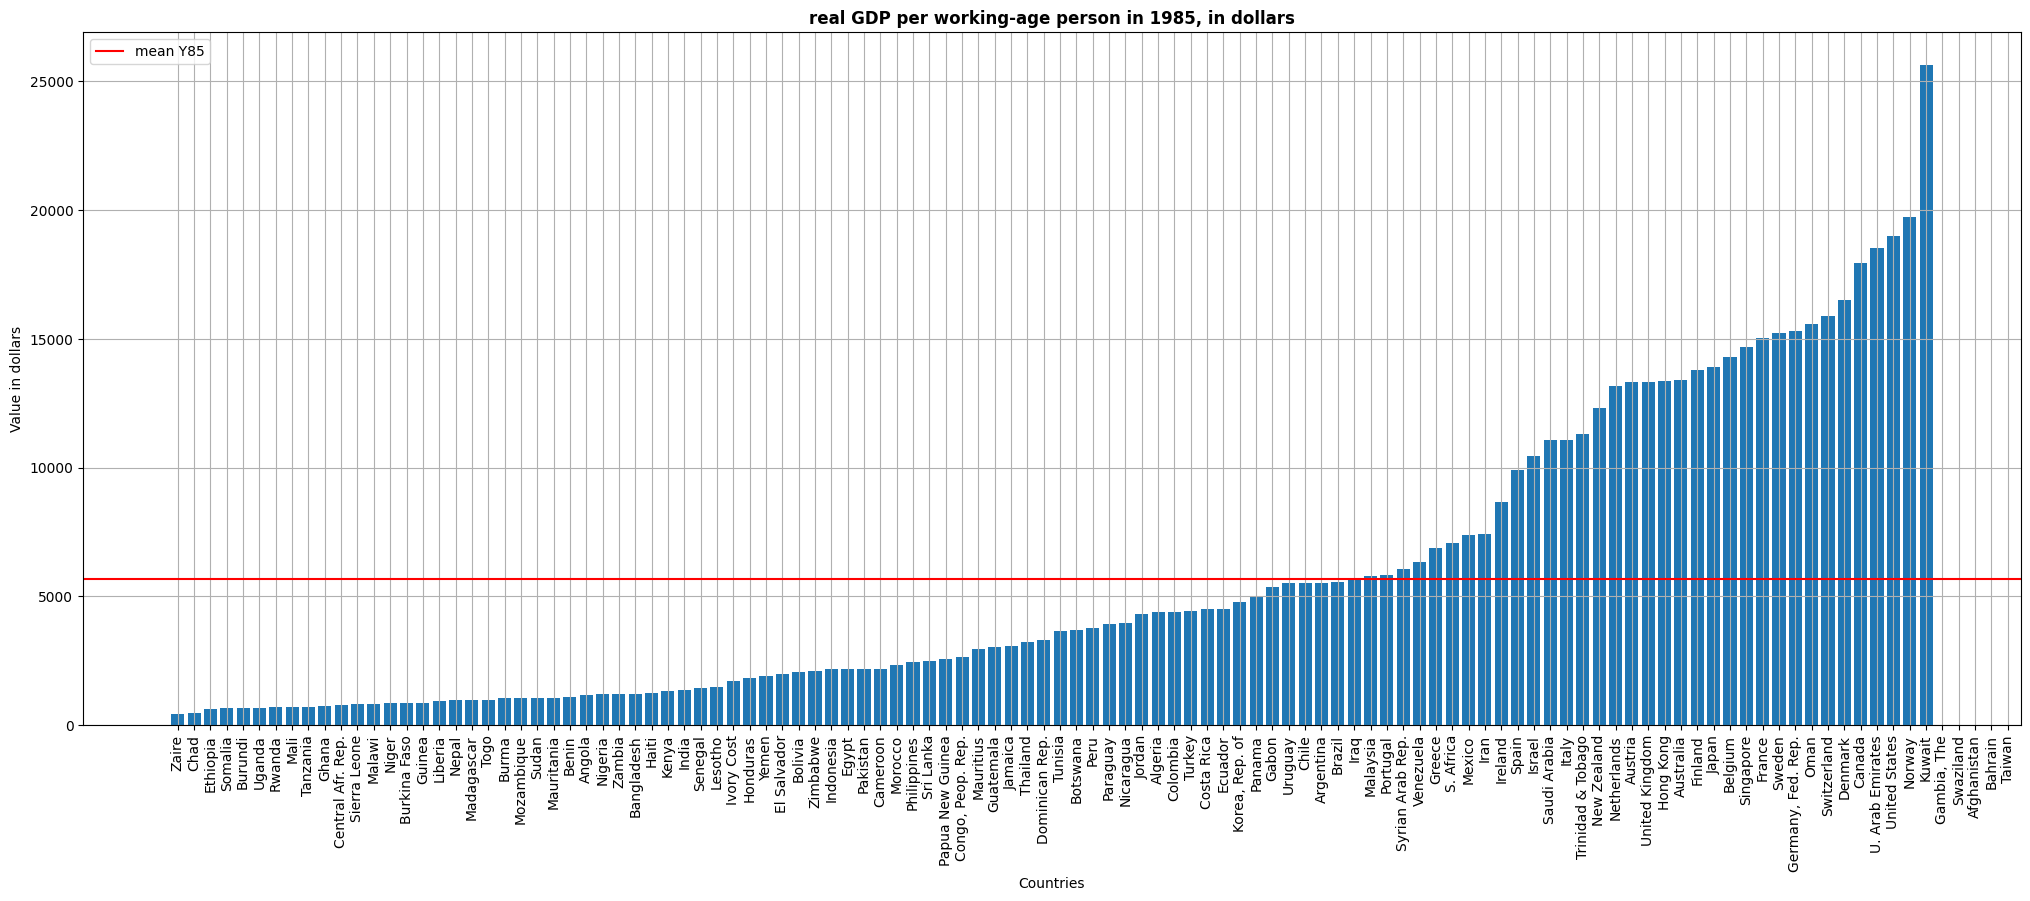

In [31]:
fig, ax = plt.subplots(figsize=(25,9))
ax.set_title('real GDP per working-age person in 1985, in dollars',fontweight="bold")
ax.bar(df.sort_values('Y85')['country'],df.sort_values('Y85')['Y85']) #sort and bar plot in one line
ax.xaxis.set_tick_params(rotation=90) #to rotate the xlabels
plt.axhline(y = df['Y85'].mean(),color='r', label='mean Y85') #for mean horizontal line
ax.set_xlabel('Countries')
ax.set_ylabel('Value in dollars')
plt.legend()
plt.grid()
plt.show()

The first graph shows the real GDP per working-age person in 1985 by countries. We can notice that although the mean is around 5.500 USD, there is a high difference between countries. Some of them are well above like the US (20.000 USD aprox), while some others are well below like Uganda (1.000 USD aprox).

Note: Data for Gambia, Swaziland, Afghanistan, Bahrain, Taiwan is not available.

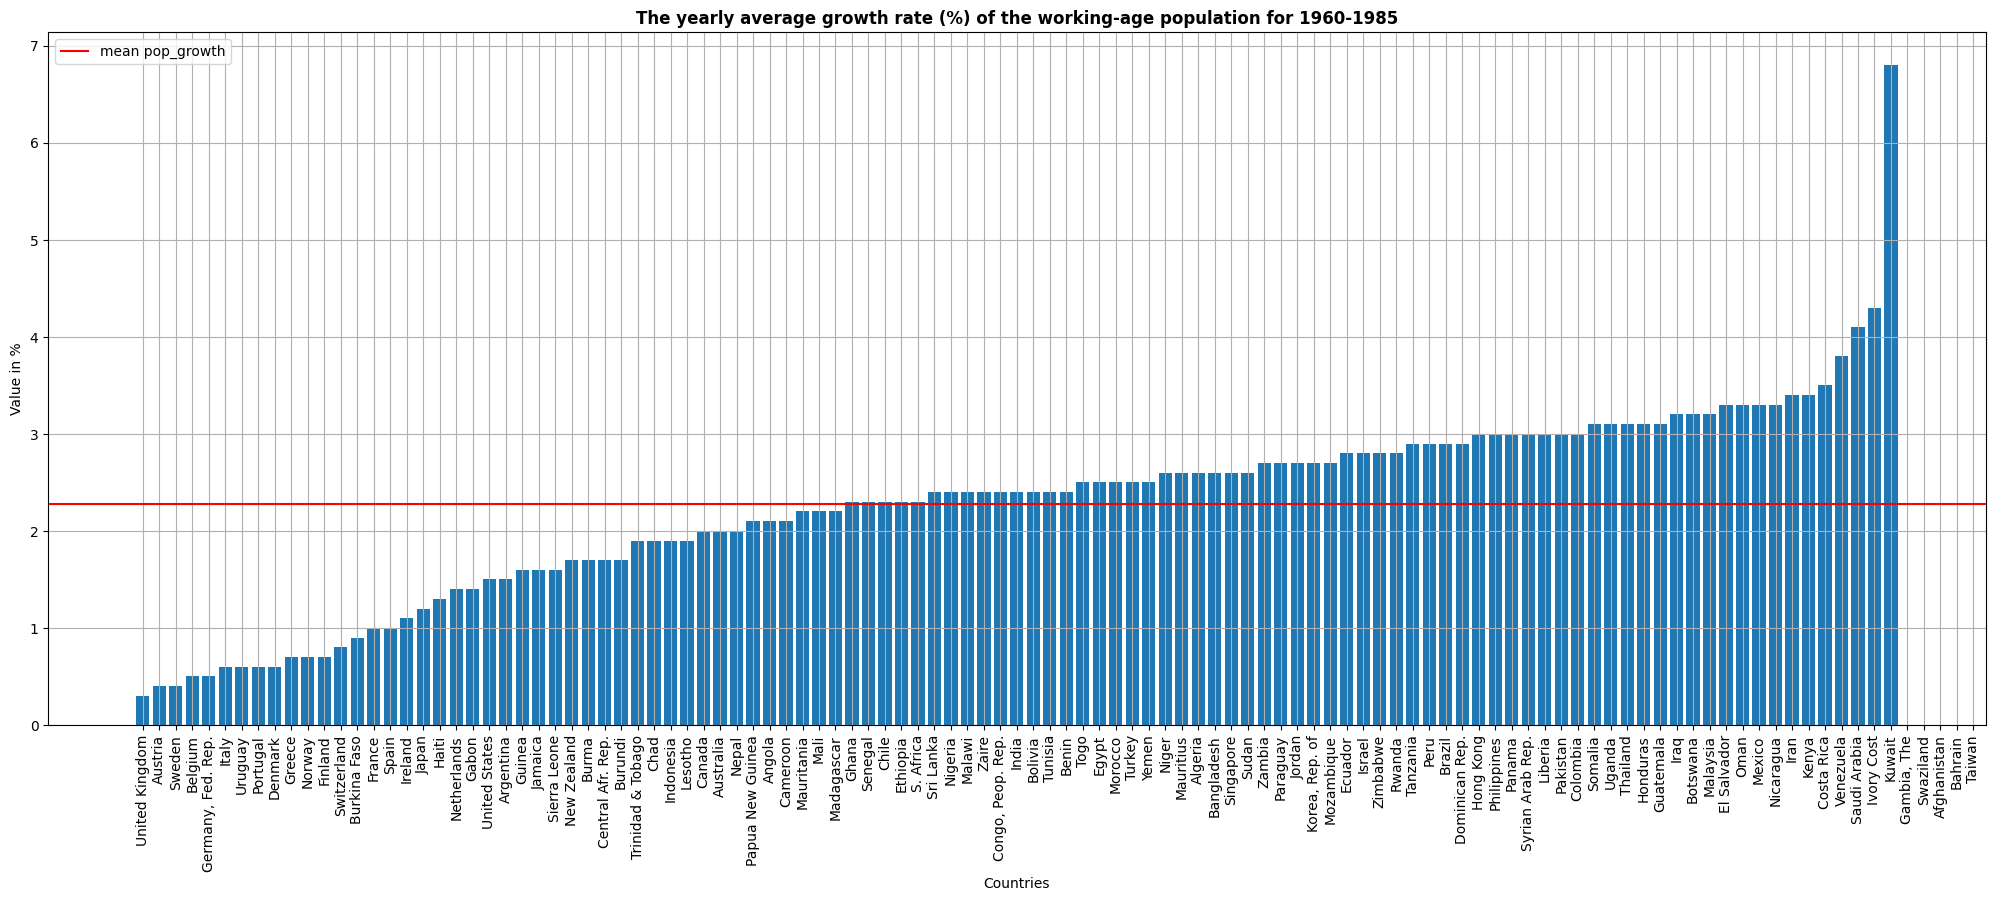

In [32]:
fig, ax = plt.subplots(figsize=(25,9))
ax.set_title('The yearly average growth rate (%) of the working-age population for 1960-1985',fontweight="bold")

ax.bar(df.sort_values('pop_growth')['country'],df.sort_values('pop_growth')['pop_growth'])#sort and bar plot in one line
plt.axhline(y = df['pop_growth'].mean(),color='r', label='mean pop_growth')#for mean horizontal line
ax.set_xlabel('Countries')
ax.set_ylabel('Value in %')
plt.legend()
ax.xaxis.set_tick_params(rotation=90)#to rotate the xlabels
plt.grid()
plt.show()

<div style={{ textAlign: 'justify' }}>

This second graph replicates the same structure, but for the yearly average growth rate % of the working-age population for 1960-1985. We can see that most countries are centred around the mean that is around 2.3%. However, some of the most advanced countries like the UK, Sweden or Belgium exhibit very low population growth rates (below 1%).

Note: Data for Gambia, Swaziland, Afghanistan, Bahrain, Taiwan is not available.
</div>

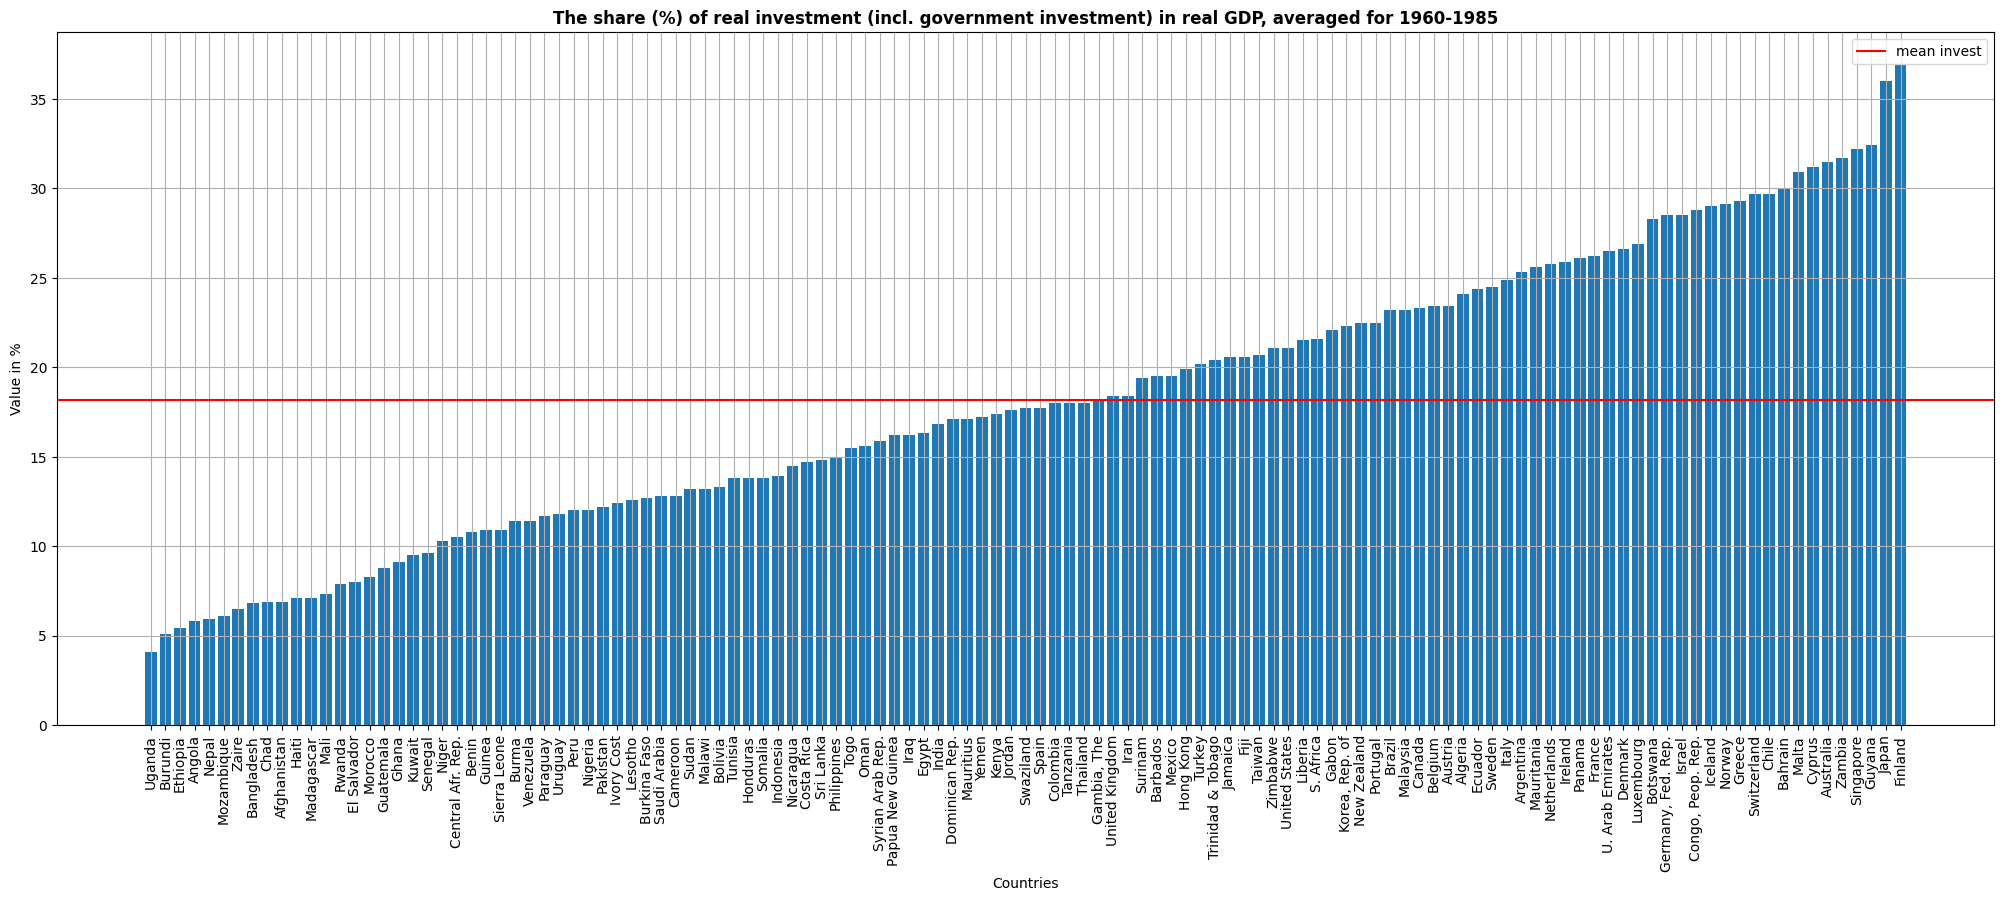

In [33]:
fig, ax = plt.subplots(figsize=(25,9))
ax.set_title('The share (%) of real investment (incl. government investment) in real GDP, averaged for 1960-1985',fontweight="bold")

ax.bar(df.sort_values('invest')['country'],df.sort_values('invest')['invest'])#sort and bar plot in one line
plt.axhline(y = df['invest'].mean(),color='r', label='mean invest')#for mean horizontal line
ax.set_xlabel('Countries')
ax.set_ylabel('Value in %')
plt.legend()
ax.xaxis.set_tick_params(rotation=90)#to rotate the xlabels
plt.grid()
plt.show()

<div style={{ textAlign: 'justify' }}>
This graph shows the share of real investment in real GDP, averaged for 1960-1985. The mean is situated around 18%. Nevertheless, very significant divergences are shown within the whole set of countries. Although the group of countries with high share of investment is quite heterogeneous, the vast majority of countries with a low share of investment are low-income countries.
</div>

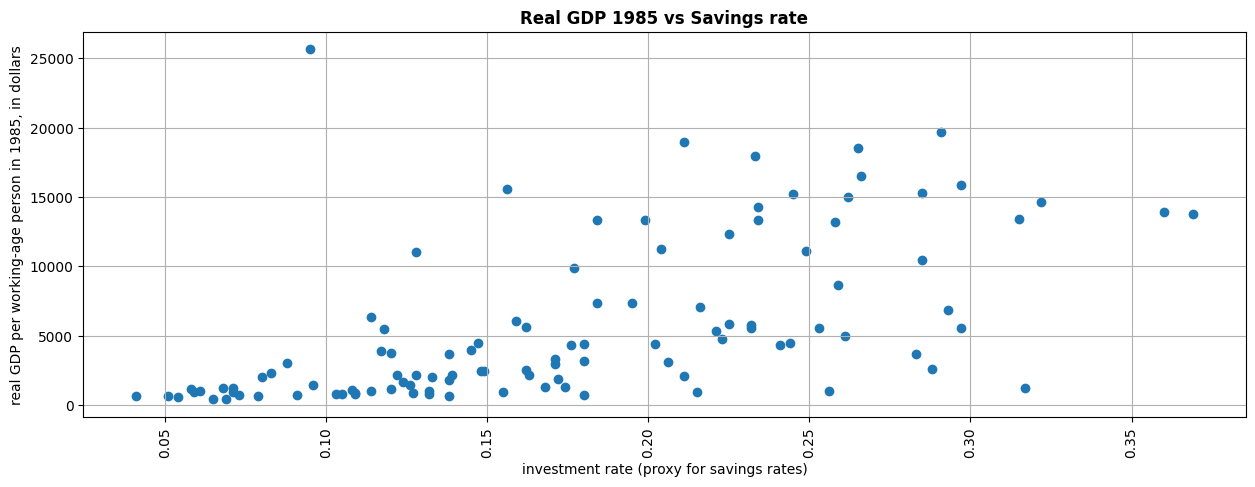

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Real GDP 1985 vs Savings rate',fontweight="bold")

ax.scatter(df['invest']/100,df['Y85'])
ax.set_xlabel('investment rate (proxy for savings rates)')
ax.set_ylabel('real GDP per working-age person in 1985, in dollars')
ax.xaxis.set_tick_params(rotation=90)
plt.grid()
plt.show()

This last graph shows the distribution of countries by real GDP, 1985 and their savings rate. There seems to be a correlation between these two variables. The higher the saving rate (using the investment rate as a proxy), the higher the real GDP. 

Note: Graph on fraction invested on human capital is in the next section.

In [35]:
print(df.head().to_markdown())

|    | country      |   N |   I |   O |   Y60 |   Y85 |   Y_growth |   pop_growth |   invest |   school |
|---:|:-------------|----:|----:|----:|------:|------:|-----------:|-------------:|---------:|---------:|
|  0 | Algeria      |   1 |   1 |   0 |  2485 |  4371 |        4.8 |          2.6 |     24.1 |      4.5 |
|  1 | Angola       |   1 |   0 |   0 |  1588 |  1171 |        0.8 |          2.1 |      5.8 |      1.8 |
|  2 | Benin        |   1 |   0 |   0 |  1116 |  1071 |        2.2 |          2.4 |     10.8 |      1.8 |
|  3 | Botswana     |   1 |   1 |   0 |   959 |  3671 |        8.6 |          3.2 |     28.3 |      2.9 |
|  4 | Burkina Faso |   1 |   0 |   0 |   529 |   857 |        2.9 |          0.9 |     12.7 |      0.4 |


### Regression Analysis

In this section we conduct two  different sets of regressions. The first set of regressions consists of a simple OLS for the three different subsamples. For this subset we take the $ log(Y/L) $ as endogenous variable and the $log(s)$ and $log(n + g + \delta)$  as exogenous variables. 

**Adding new variables as per the required econometric model**

In [36]:
#getting log variables to run the regressions

df['log_Y85']=np.log(df['Y85'])
df['log_s']=np.log(df['invest']/100) # MRW 1992 calculate savings rate with investment as a proxy for savings
df['log_school']=np.log(df['school']/100)
df['log_ngd']=np.log((df['pop_growth']/100)+0.05) #we calculate (n+g+delta) using population growth (n) and 
#adding 0.05, since MRW 1992 assume that g + delta is 0.05

In [37]:
#Unrestricted regression for non oil countries
reg1 = sm.ols("log_Y85 ~ log_s+ log_ngd",data=df[df['N']==1]).fit()

#Unrestricted regression for Intermediate countries
reg2 = sm.ols("log_Y85 ~ log_s+ log_ngd",data=df[df['I']==1]).fit()

#Unrestricted regression for OECD countries
reg3 = sm.ols("log_Y85 ~ log_s+ log_ngd",data=df[df['O']==1]).fit()

#Below is the syntax for sm.ols
#sm.ols("dependent variable ~ independent variable 1 + independent variable 2 +...., data=dataframe").fit()


<div style={{ textAlign: 'justify' }}>

The second set of regressions consists of an OLS regression for the three different subsamples, but imposing the condition that the coefficients of $log(s)$ and $log(n + g + \delta)$ must be of equal magnitude but in different sign. This condition comes from the derivation of the steady state in the Solow model. Therefore, for this subset we take the $ log(Y/L) $  as endogenous variable and the difference of $log(s)$ and $log(n + g + \delta)$ as exogenous. 
</div>

In [38]:
df['s_minus_ngd']=df['log_s'] - df['log_ngd'] 
#We take differences to impose the condition that both coefficients have to be of same magnitude with opposite sign.

In [39]:
#Restricted regression for non oil countries
reg1_restricted = sm.ols("log_Y85 ~ s_minus_ngd",data=df[df['N']==1]).fit()

#Restricted regression for Intermediate countries
reg2_restricted = sm.ols("log_Y85 ~ s_minus_ngd",data=df[df['I']==1]).fit()

#Restricted regression for OECD countries
reg3_restricted = sm.ols("log_Y85 ~ s_minus_ngd",data=df[df['O']==1]).fit()

### Results

In [40]:
info_dictu = {'N': lambda x: x.nobs,'s.e.e.': lambda x: np.sqrt(x.scale)} 
# above code adds extra info in unrestricted regression table like number of observations and standard error of estimate

info_dictr = {'N': lambda x: x.nobs, 's.e.e.': lambda x: np.sqrt(x.scale),
             'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1]):.2f}"}
# above code adds extra info in restricted regression table like number of observations, standard error of estimate and Implied alpha.
# implied alpha calculation: (alpha/(1-alpha))=params[1], now solve for alpha we get alpha=params[1]/(1+params[1]). Refer MRW 1992
# params[1] gives you the coefficient of 1st independent variable in the regression.



results_unres = summary_col(results = [reg1, reg2, reg3],float_format='%0.3f',stars = True,
                           model_names = ['Non-Oil','Intermediate','OECD'], 
                           info_dict = info_dictu, regressor_order = ['Intercept','log_s','log_ngd'])
#model_names for Column heading
#info_dict to add extra info
#float_format='%0.3f' : print results upto three decimal places
#in unrestricted table, implied alpha is not required.
#regressor_order tells you what independent variables you want to print first.

results_res = summary_col(results = [reg1_restricted, reg2_restricted, reg3_restricted],float_format='%0.3f',
                          stars = True, model_names = ['Non-Oil','Intermediate','OECD'],
                          info_dict = info_dictr,regressor_order = ['Intercept','s_minus_ngd'])
                                             

results_unres.add_title('Unrestricted Regressions')
results_res.add_title('Restricted Regressions')


print(results_unres)

print('\n') #add some space between the two tables

print(results_res)


           Unrestricted Regressions
                Non-Oil  Intermediate   OECD  
----------------------------------------------
Intercept      5.430***  5.346***     8.021***
               (1.584)   (1.543)      (2.518) 
log_s          1.424***  1.318***     0.500   
               (0.143)   (0.171)      (0.434) 
log_ngd        -1.990*** -2.017***    -0.742  
               (0.563)   (0.534)      (0.852) 
R-squared      0.601     0.599        0.106   
R-squared Adj. 0.592     0.588        0.012   
N              98.0000   75.0000      22.0000 
s.e.e.         0.6891    0.6106       0.3774  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


           Restricted Regressions
               Non-Oil  Intermediate   OECD  
---------------------------------------------
Intercept      6.872*** 7.093***     8.624***
               (0.121)  (0.146)      (0.533) 
s_minus_ngd    1.488*** 1.431***     0.554   
               (0.125)  (0.139)      (0.365) 
R-squared      0.597    0.592

<div style={{ textAlign: 'justify' }}>

The two sets of results are presented in this section. In the top table we show the unrestricted results for the three subsamples given the econometric specification described in 3). The first remarkable fact is that the signs of the coefficients are as expected for the three subsamples: positive for the rate savings (in logs) and negative for population growth (in logs). Moreover, the coefficients are statistically significant for the first two subsamples. Due to the sample size, coefficients in the third subsample are not statistically significant. We obtain a similar picture when focusing on the r2. For the first two subsamples we obtain a relatively high r2 (0.59 and 0.58 respectively) while in the OECD subsample the r2 goes down to 0.0118. 

In the bottom table we show the results under the restricted condition for the three subsamples. We get very similar results when we apply this constraint, indicating that the constraint is satisfied. The coefficient is similar and significant and the r2 in the first two subsamples is again high. The third subsample still suffers from sample size issues. 

When it comes to the magnitude of the coefficient, nevertheless, these results do not support Solow Model at all. According to the output per worker equation presented in the econometric specification, the magnitude of reported coefficients implies a share of capital ($\alpha$) of 0.59. This value is much higher than the empirical level of capital share which is around 1/3. Although the implied $\alpha$ in the OECD subsample is very close to 1/3, 0.36, the low r2 prevents us from trusting these results. Therefore, looking at the first two subsamples, we can say that although the regressions explain high proportion of income variation, we cannot conclude that Solow Model holds with real data. The high value of reported savings coefficient may be capturing the effect of other components such as externalities from capital accumulation.
</div>

## Empirical testing of the augmented Solow model

<div style={{ textAlign: 'justify' }}>

In this second part we follow Mankiw, Romer, Weil (1992) to provide the extension of the Solow Model adding human capital. We first present the model theoretically and then provide an empirical analysis similar to the one conducted before. 

### Augmented Solow Model
Since in this case we include human capital, cobb-douglas production function is 

$$
\begin{align*}
Y_t = K_t^{\alpha}H_t^{\beta}(A_tL_t)^{1 - \alpha - \beta}
\end{align*}
$$

Where H is the stock of human capital and the rest of the variables remain the same as before. Now, we will have not only a capital accumulation equation, but also a human capital accumulation equation evolving over time.

$$
\begin{align*}
\dot{k_t} = s_{k}y_t - (n + g +\delta)k_t\\ 
\dot{h_t} = s_{h}y_t - (n + g +\delta)h_t\\
\end{align*}
$$

Where $k = \frac{K}{AL}, \hspace{0.2cm}y = \frac{Y}{AL}$ and $\hspace{0.2cm}h = \frac{H}{AL}$. Also, $s_{k}$ stands for the fraction of income invested in physical capital while $s_{h}$ stand for the fraction invested in human capital. Therefore, we assume that the same production function applies to human capital, physical capital and consumption. It is also assumed that depreciation rate $\delta$ is same for both human and physical capital. Last assumption is that $\alpha + \beta < 1$, which implies that there are decreasing returns to scale to all capital and hence that the economy converges to a steady state where

$$
\begin{align*}
k^* = \left(\frac{s_k^{1-\beta}s_h^{\beta}}{n + g + \delta}\right)^{1/(1 - \alpha - \beta)}
h^* = \left(\frac{s_k^{\alpha}s_h^{1-\alpha}}{n + g + \delta}\right)^{1/(1 - \alpha - \beta)}
\end{align*}
$$

Given $h^*$ and $k^*$ we can derive the following steady state level of output per worker:

$$
\begin{align*}
ln(Y_t/L_t) = lnA(0) + gt + \frac{\alpha}{(1 - \alpha - \beta)}ln(s_k) + \frac{\beta}{(1 - \alpha - \beta)}ln(s_h) - \frac{\alpha + \beta}{(1 - \alpha - \beta)}ln(n + g + \delta)
\end{align*}
$$

This equation implies two things. First, that the presence of human-capital accumulation increases the impact of physical-capital accumulation of income. Second, that high population growth lowers income per capita because the amounts of both physical and human capital must be spread more thinly over the population.

The output per worker equation can be expressed as a function of the level of $h^*$ instead of $s_h$

$$
\begin{align*}
ln(Y_t/L_t) = lnA(0) + gt + \frac{\alpha}{(1 - \alpha)}ln(s_k) + \frac{\beta}{(1 - \alpha)}ln(h^*) - \frac{\alpha}{(1 - \alpha)}ln(n + g + \delta)
\end{align*}
$$

We can notice that this expression is similar to the econometric speficiation used before. The main difference  is that now we included the stock of human capital, which in the previous specification would be a component of the error term and hence, a cause of OVB.
</div>


<div style={{ textAlign: 'justify' }}>

### Econometric Specification, assumptions & preview of the answer

Given that the stock of human capital is very hard to estimate, we rely on the expression of the $ln(Y_t/L_t)$ as a function of $ln(s_k), ln(s_h) \hspace{0.2cm}and \hspace{0.2cm} ln(n + g + \delta)$ as a final econometric specification.

$$
\begin{align*}
ln(Y_t/L_t) = lnA(0) + gt + \frac{\alpha}{(1 - \alpha - \beta)}ln(s_k) + \frac{\beta}{(1 - \alpha - \beta)}ln(s_h) - \frac{\alpha + \beta}{(1 - \alpha - \beta)}ln(n + g + \delta)
\end{align*}
$$

Assumptions in this case are similar to those assumed for the Solow Model. First, aiming to use this specification, we assume $g$ (advancement of knowledge) and $\delta$ (rate of depreciation) to be constant across countries. Second, in order to satisfy exogeneity condition and estimate the model with Ordinary Least Squares (OLS), we need to assume that $s_k$, $s_h$ and $n$ are fully exogenous. 

**Preview answer** 

Using OLS method and assuming a set of assumptions we expect to obtain reliable coefficients for $s_h$, $s_k$ and $ (n + g + \delta)$. We await for a positive coefficient of $s_k$ and $s_h$, and a negative coefficient for $ (n + g + \delta)$, with a magnitude equal the sum of the other two coefficients. We also expect a high r2 to explain output per worker variations and an implied value of $\alpha$ close to 1/3 (the empirical share of capital found).
</div>

### Data and subsamples

<div style={{ textAlign: 'justify' }}>
The dataset used is the same as before. In this case we will include the variable school as a proxy for the fraction invested in human capital. This variable measures approximately the percentage of the working-age population that is in secondary school. Although far from perfect, as long as it is proportional to $ln(s_h)$ we can use it to estimate our equations.
</div>

**Data visualisation**

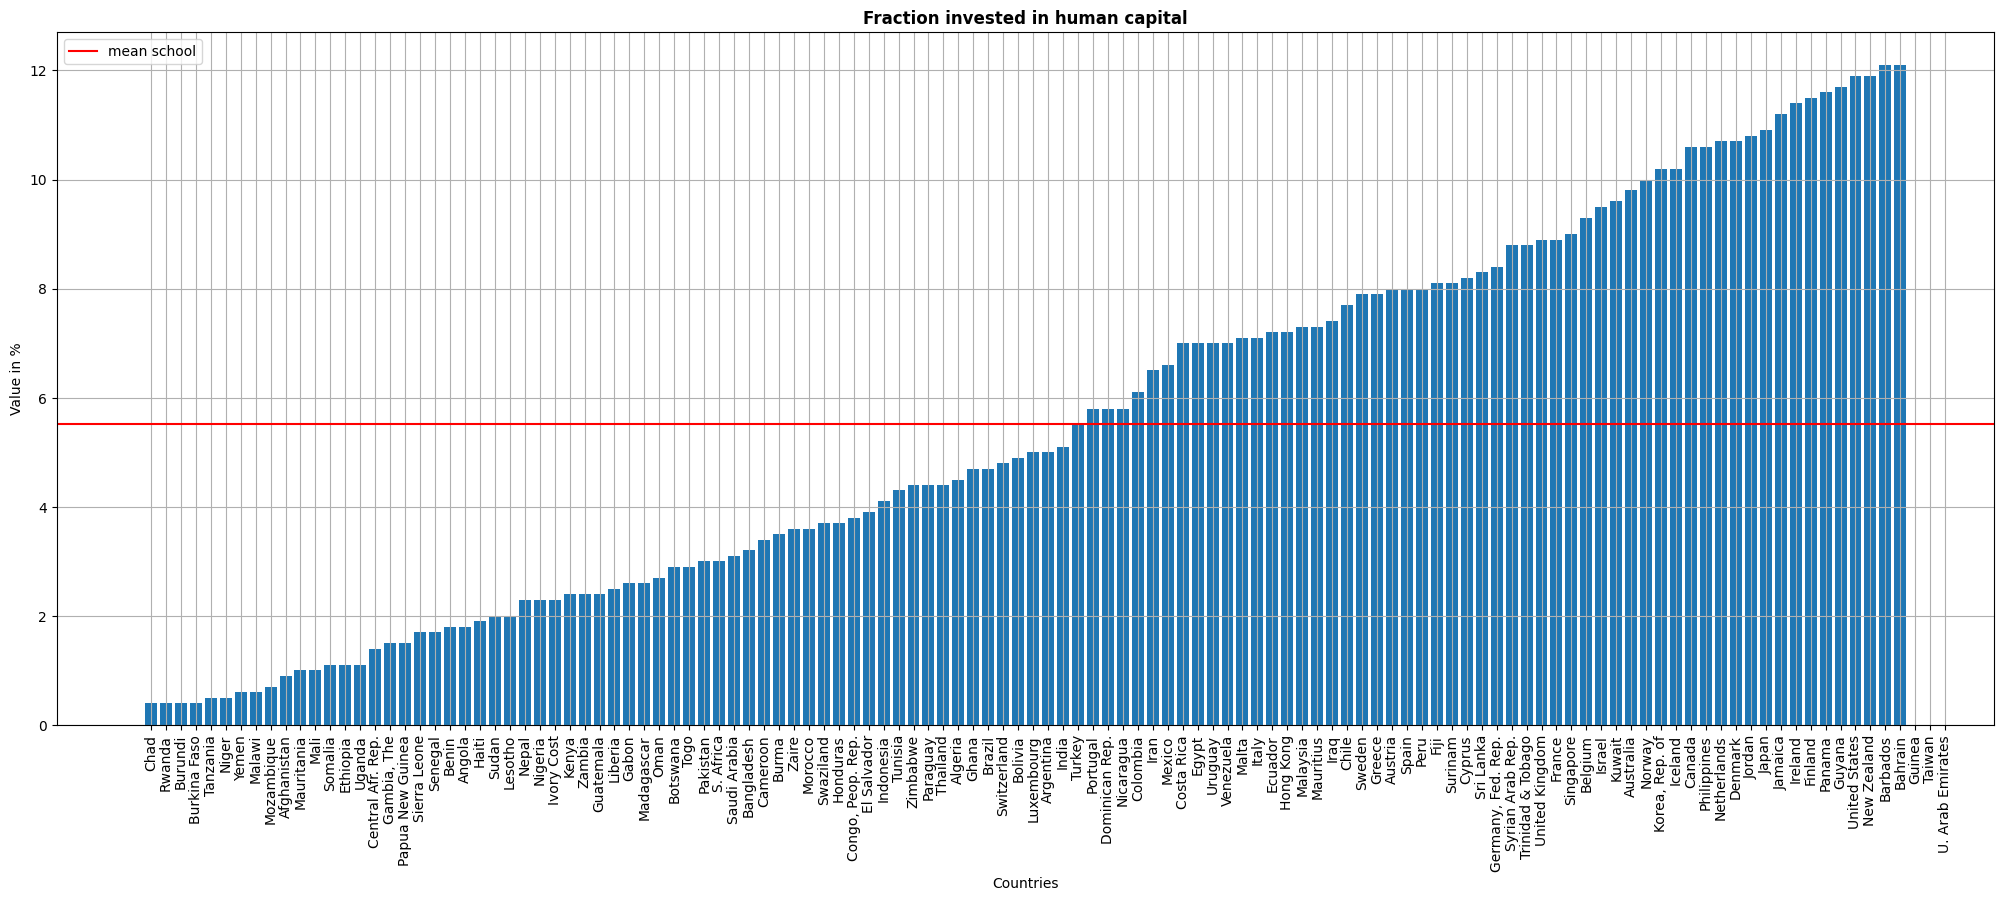

In [41]:
fig, ax = plt.subplots(figsize=(25,9))
ax.set_title('Fraction invested in human capital',fontweight="bold")
ax.bar(df.sort_values('school')['country'],df.sort_values('school')['school'])#sort and bar plot in one line
ax.xaxis.set_tick_params(rotation=90)#to rotate the xlabels
plt.axhline(y = df['school'].mean(),color='r', label='mean school')#for mean horizontal line
ax.set_xlabel('Countries')
ax.set_ylabel('Value in %')
plt.legend()
plt.grid()
plt.show()

<div style={{ textAlign: 'justify' }}>

Since for this model we add the stock of human capital, we present a graph for the fraction invested in human capital by countries. The mean is between 5-6%, but the differences between countries are very significant. Similar to the insights taken from the share of savings, most of the countries that report low fraction invested in human capital are low income countries. 
</div>

### Regression Analysis

Similar to what we did for the Solow Model, we conduct two sets of regressions. The first set is unrestricted and for the three subsamples we take $log(Y/L)$  as endogenous variable and $log(s_h)$, $log(s_k)$ and  $log(n + g + \delta)$ as exogenous variables. 

In [42]:
#Unrestricted regression for non oil countries
reg1_hc = sm.ols("log_Y85 ~ log_s+ log_ngd + log_school",data=df[df['N']==1]).fit()

#Unrestricted regression for Intermediate countries
reg2_hc = sm.ols("log_Y85 ~ log_s+ log_ngd+ log_school",data=df[df['I']==1]).fit()

#Unrestricted regression for OECD countries
reg3_hc = sm.ols("log_Y85 ~ log_s+ log_ngd+ log_school",data=df[df['O']==1]).fit()

<div style={{ textAlign: 'justify' }}>

The second set is restricted. According to the expression of $ln(Y_t/L_t)$ derived before, we impose that the coefficients on $ln(s_k), ln(s_h),$ and $ln(n + g + \delta)$ sum to zero. Therefore, for this subset we take the $ log(Y/L) $  as endogenous variable and the difference of $log(s_h)$ and $log(n + g + \delta)$ and the difference of $log(s_k)$ and $log(n + g + \delta)$ as exogenous variables. 

</div>

In [43]:
df['school_minus_ngd']=df['log_school'] - df['log_ngd'] #We take differences to impose the condition that
#(n+g+\delta), s_h and s_k coefficients sum to 0.

In [44]:
#Restricted regression for non oil countries
reg1_restricted_hc = sm.ols("log_Y85 ~ s_minus_ngd + school_minus_ngd ",data=df[df['N']==1]).fit()

#Restricted regression for Intermediate countries
reg2_restricted_hc = sm.ols("log_Y85 ~ s_minus_ngd + school_minus_ngd",data=df[df['I']==1]).fit()

#Restricted regression for OECD countries
reg3_restricted_hc = sm.ols("log_Y85 ~ s_minus_ngd + school_minus_ngd",data=df[df['O']==1]).fit()

### Results

In [46]:
info_dictu = {'N': lambda x: x.nobs,'s.e.e.': lambda x: np.sqrt(x.scale)}
# above code adds extra info in unrestricted regression table like number of observations and standard error of estimate

info_dictr = {'N': lambda x: x.nobs,'s.e.e.': lambda x: np.sqrt(x.scale),
              'Implied α': lambda x: f"{x.params[1]/(1 + x.params[1] + x.params[2]):.3f}",
              'Implied β': lambda x: f"{x.params[2]/(1 + x.params[1] + x.params[2]):.3f}"}
# above code adds extra info in restricted regression table like number of observations, standard error of estimate and implied alpha & beta.
# implied alpha & beta calculation: refer the markdown cell after this code
# params[1] gives you the coefficient of 1st independent variable in the regression.
# params[2] gives you the coefficient of 2nd independent variable in the regression.

results_unres = summary_col(results = [reg1_hc, reg2_hc, reg3_hc],float_format='%0.3f',stars = True,
                            model_names = ['Non-Oil','Intermediate','OECD'],info_dict = info_dictu,
                            regressor_order = ['Intercept','log_s','log_ngd','log_school'])

#model_names for Column heading
#info_dict to add extra info
#float_format='%0.3f' : print results upto three decimal places
#in unrestricted table, implied alpha & beta is not required.
#regressor_order tells you what independent variables you want to print first.

results_res = summary_col(results = [reg1_restricted_hc, reg2_restricted_hc, reg3_restricted_hc],float_format='%0.3f',
                          stars = True,model_names = ['Non-Oil','Intermediate','OECD'],info_dict = info_dictr,
                          regressor_order = ['Intercept','s_minus_ngd','school_minus_ngd'])


results_res.add_title('Restricted Regressions')
results_unres.add_title('Unrestricted Regressions')
print(results_unres)
print('\n')
print(results_res)

           Unrestricted Regressions
                Non-Oil  Intermediate   OECD  
----------------------------------------------
Intercept      6.844***  7.791***     8.637***
               (1.177)   (1.192)      (2.214) 
log_s          0.697***  0.700***     0.276   
               (0.133)   (0.151)      (0.389) 
log_ngd        -1.745*** -1.500***    -1.076  
               (0.416)   (0.403)      (0.756) 
log_school     0.654***  0.731***     0.768** 
               (0.073)   (0.095)      (0.293) 
R-squared      0.786     0.781        0.352   
R-squared Adj. 0.779     0.771        0.244   
N              98.0000   75.0000      22.0000 
s.e.e.         0.5077    0.4547       0.3300  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


            Restricted Regressions
                 Non-Oil  Intermediate   OECD  
-----------------------------------------------
Intercept        7.853*** 7.966***     8.716***
                 (0.140)  (0.154)      (0.466) 
s_minus_ngd      0

Note: Implied alpha & beta calculation in restricted regression:

$\frac{\alpha}{1-\alpha-\beta} - \frac{\alpha + \beta}{1-\alpha-\beta}$ = regression coefficient of s_minus_ngd

$\frac{\beta}{1-\alpha-\beta} - \frac{\alpha + \beta}{1-\alpha-\beta}$ = regression coefficient of school_minus_ngd

We have two unknowns ($\alpha$ and $\beta$) and two equations as restricted regression provides the values of s_minus_ngd and school_minus_ngd. We can solve for $\alpha$ and $\beta$. And we get:

$\alpha= \frac{s\_minus\_ngd}{1+s\_minus\_ngd+school\_minus\_ngd}$

$\beta= \frac{school\_minus\_ngd}{1+s\_minus\_ngd+school\_minus\_ngd}$

s_minus_ngd and school_minus_ngd are params[1] and params[2] respectively in the above code.

<div style={{ textAlign: 'justify' }}>

**Comment on the regression results**

This section presents the results of the empirical analysis of the augmented Solow Model. The first thing to notice is that the coefficients do not vary a lot when imposing the restriction condition. This tells us that the restriction is satisfied. The sign of the coefficients is, again, as expected and in the first two subsampels, all of them are statistically significant. 

A first important difference with respect to the results for the simple Solow model is that in this case the r^2 rises to 0.78. That is, when adding human capital to the regressions, we are explaining a greater share of output per worker variations. The second relevant difference is the magnitude of the coefficients. With the reported coefficients for the augmented Solow Model, the implied $\alpha$ ranges between 0.29 and 0.31, which is much closer to the 1/3 empirically found. 

Again, results from the OECD sample are biased due to a very small sample size. 

In general, these results seems to support the augmented Solow Model. That is, including human capital to the Solow Model helps explain output per worker variations, even when the proxy for the fraction invested in human capital is not perfect.

</div>

## Conclusions and discussion: 

<div style={{ textAlign: 'justify' }}>
In this paper, we followed Mankiw, Romer, Weil (1992) to address three different questions; 1) How Solow Model works and what are its dynamics? 2) Does the Solow Model hold with real world data? And  3) Does the augmented Solow Model hold with real world data?

For the first question, we derived and explained the Solow Model and we conducted a model simulation showing its dynamics. It is shown that the Solow Model is characterised by decreasing returns to scale in capital, which leads to a common steady state for all countries that have same parameters (population growth ($n$), technological growth ($g$), depreciation ($\delta$), savings rate ($s$) and capital's share in income ($\alpha$)).  This model, hence, implies the existence of unconditional convergence once the values of the parameters are reached. 

Given these astonishing implications, we tested the validity of the model with real world data through an empirical analysis. We used the output per worker equation in the steady state as a reference for the econometric specification. Although the sign of the reported coefficients is correct and the restriction condition is met, the magnitude seems to overstate the influence of savings. The most problematic result is the implied value of alpha. It is reported to be around 0.57 while the empirical share of capital found is 1/3. These results reject the validity of the Solow Model to explain income per capita variations. 

As an alternative, in section 4 we presented the augmented Solow Model, including the stock of human capital as an input in the production function. Once derived the model, we used again the expression of output per worker in steady state as econometric specification to test the model with real world data. The results, in this case, seems to support the augmented Solow Model since the reported coefficients are as expected and the implied value of alpha in this case is much closer to the 1/3. 

However, these results are not exempt from discussion because they heavily rely on strong assumptions made to avoid endogeneity problems. The first potential problem is the existence of Omitted Variable Bias; many variables such as the quality of institutions or the land are not included and may well be correlated with other variables such as the savings rate. The second major issue that could arise is Measurement Error. It is recognized by the authors that not all available data is perfect and homogeneous. Specifically, in the case of the “school” variable, it is stated that it is a very imperfect proxy to capture the fraction invested in human capital. The third potential issue is Reverse Causality; in this paper, we regress output per worker on savings rate. However, it could be that savings rate is also affected by the level of output per worker. In order to avoid this issue, we should find a completely exogenous variation of savings (maybe through an instrument).

All in all, although the results of this paper should not be interpreted causally, they do show that when adding human capital to the Solow model, it explains much more of the international variation in income per capita (or output per worker) and with a very realistic implied values of alpha and beta.

</div>

## References

Barro, R., & Sala-i-Martin, X. (2004). Economic growth second edition.

Blanchard, O. J., Fischer, S., & BLANCHARD, O. A. (1989). Lectures on macroeconomics. MIT press.

Data: Professor Bruce E. Hansen of University of Wisconsin Madison, USA.

Mankiw, N. G., Romer, D., & Weil, D. N. (1992). A contribution to the empirics of economic growth. The quarterly journal of economics, 107(2), 407-437.

MIT OCW : Intermediate Macroeconomics lecture slides by Prof. George Marios Angeletos

Solow, R. M. (1956). A contribution to the theory of economic growth. The quarterly journal of economics, 70(1), 65-94.

Summers, R., & Heston, A. (1988). A new set of international comparisons of real product and price levels estimates for 130 countries, 1950–1985. Review of income and wealth, 34(1), 1-25.